In [1]:
# import required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, ShuffleSplit, KFold
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('msd_summary.csv', delimiter = ',')
df.head()

,Unnamed: 0,analysis_sample_rate,audio_md5,danceability,duration,end_of_fade_in,energy,idx_bars_confidence,idx_bars_start,idx_beats_confidence,...,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid,idx_artist_mbtags,year
0,0,22050,aee9820911781c734e7694c5432990ca,0.0,252.05506,2.049,0.0,0,0,0,...,0,0,Monster Ballads X-Mas,633681,0.542899,SOQMMHC12AB0180CB8,Silent Night,7032331,0,2003
1,1,22050,ed222d07c83bac7689d52753610a513a,0.0,156.55138,0.258,0.0,0,0,0,...,0,0,Karkuteillä,145266,0.299877,SOVFVAK12A8C1350D9,Tanssi vaan,1514808,0,1995
2,2,22050,96c7104889a128fef84fa469d60e380c,0.0,138.97098,0.000,0.0,0,0,0,...,0,0,Butter,625706,0.617871,SOGTUKN12AB017F4F1,No One Could Ever,6945353,0,2006
3,3,22050,0f7da84b6b583e3846c7e022fb3a92a2,0.0,145.05751,0.000,0.0,0,0,0,...,0,0,De Culo,199368,NaN,SOBNYVR12A8C13558C,Si Vos Querés,2168257,0,2003
4,4,22050,228dd6392ad8001b0281f533f34c72fd,0.0,514.29832,0.000,0.0,0,0,0,...,0,0,Rene Ablaze Presents Winter Sessions,209038,NaN,SOHSBXH12A8C13B0DF,Tangle Of Aspens,2264873,0,0


In [3]:
df.columns

Index(['Unnamed: 0', 'analysis_sample_rate', 'audio_md5', 'danceability',
       'duration', 'end_of_fade_in', 'energy', 'idx_bars_confidence',
       'idx_bars_start', 'idx_beats_confidence', 'idx_beats_start',
       'idx_sections_confidence', 'idx_sections_start',
       'idx_segments_confidence', 'idx_segments_loudness_max',
       'idx_segments_loudness_max_time', 'idx_segments_loudness_start',
       'idx_segments_pitches', 'idx_segments_start', 'idx_segments_timbre',
       'idx_tatums_confidence', 'idx_tatums_start', 'key', 'key_confidence',
       'loudness', 'mode', 'mode_confidence', 'start_of_fade_out', 'tempo',
       'time_signature', 'time_signature_confidence', 'track_id',
       'analyzer_version', 'artist_7digitalid', 'artist_familiarity',
       'artist_hotttnesss', 'artist_id', 'artist_latitude', 'artist_location',
       'artist_longitude', 'artist_mbid', 'artist_name', 'artist_playmeid',
       'genre', 'idx_artist_terms', 'idx_similar_artists', 'release',
       

In [4]:
print(f'columns count {len(df.columns)}')

columns count 54


In [5]:
# removing unique columns & personal information to generalize the model
# then, the model would be able predict song popularity even with new singers 

df.drop(['Unnamed: 0', 'analysis_sample_rate', 'audio_md5', 'track_id', 'artist_7digitalid', 'release_7digitalid', 'release', 'song_id', 'artist_longitude', 'artist_mbid', 'artist_name', 'artist_playmeid', 'track_7digitalid', 'artist_id', 'artist_latitude', 'artist_location',
         'idx_bars_confidence', 'idx_bars_start', 'idx_beats_confidence',
       'idx_beats_start', 'idx_sections_confidence', 'idx_sections_start',
       'idx_segments_confidence', 'idx_segments_loudness_max',
       'idx_segments_loudness_max_time', 'idx_segments_loudness_start',
       'idx_segments_pitches', 'idx_segments_start', 'idx_segments_timbre',
       'idx_tatums_confidence', 'idx_tatums_start', 'idx_artist_terms', 'idx_similar_artists', 'idx_artist_mbtags', 
         'analyzer_version'
        ], axis=1, inplace=True)

In [6]:
df.head()

,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,genre,song_hotttnesss,title,year
0,0.0,252.05506,2.049,0.0,10,0.777,-4.829,0,0.688,236.635,87.002,4,0.940,0.649822,0.394032,NaN,0.542899,Silent Night,2003
1,0.0,156.55138,0.258,0.0,9,0.808,-10.555,1,0.355,148.660,150.778,1,0.000,0.439604,0.356992,NaN,0.299877,Tanssi vaan,1995
2,0.0,138.97098,0.000,0.0,7,0.418,-2.060,1,0.566,138.971,177.768,4,0.446,0.643681,0.437504,NaN,0.617871,No One Could Ever,2006
3,0.0,145.05751,0.000,0.0,7,0.125,-4.654,1,0.451,138.687,87.433,4,0.000,0.448501,0.372349,NaN,NaN,Si Vos Querés,2003
4,0.0,514.29832,0.000,0.0,5,0.097,-7.806,0,0.290,506.717,140.035,4,0.315,0.000000,0.000000,NaN,NaN,Tangle Of Aspens,0


In [7]:
df.columns

Index(['danceability', 'duration', 'end_of_fade_in', 'energy', 'key',
       'key_confidence', 'loudness', 'mode', 'mode_confidence',
       'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'artist_familiarity', 'artist_hotttnesss',
       'genre', 'song_hotttnesss', 'title', 'year'],
      dtype='object')

In [8]:
# remove data points of which does not contains song_hotttness 
print(f'Before shape = {df.shape}')
df.dropna(subset=['song_hotttnesss'], inplace=True)
print(f'After shape = {df.shape}')

Before shape = (1000000, 19)
After shape = (581965, 19)


In [9]:
df.head()

,danceability,duration,end_of_fade_in,energy,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,genre,song_hotttnesss,title,year
0,0.0,252.05506,2.049,0.0,10,0.777,-4.829,0,0.688,236.635,87.002,4,0.940,0.649822,0.394032,NaN,0.542899,Silent Night,2003
1,0.0,156.55138,0.258,0.0,9,0.808,-10.555,1,0.355,148.660,150.778,1,0.000,0.439604,0.356992,NaN,0.299877,Tanssi vaan,1995
2,0.0,138.97098,0.000,0.0,7,0.418,-2.060,1,0.566,138.971,177.768,4,0.446,0.643681,0.437504,NaN,0.617871,No One Could Ever,2006
12,0.0,301.60934,0.000,0.0,1,0.450,-4.882,1,0.520,291.405,85.340,5,0.581,0.622005,0.451579,NaN,0.392009,Cold Beer feat. Prince Metropolitan,0
13,0.0,318.45832,0.502,0.0,10,0.764,-10.670,1,0.627,306.265,67.567,3,0.676,0.621826,0.406985,NaN,0.463490,Pilots,2005


In [10]:
df = df.head(10000)

In [11]:
# check genre 
genre = list(df['genre'].unique())
genre

[nan]

In [12]:
df.drop(['genre'], axis=1, inplace=True)

In [13]:
# check danceability 
danceability = list(df['danceability'].unique())
danceability

[0.0]

In [14]:
df.drop(['danceability'], axis=1, inplace=True)

In [15]:
# check energy 
energy = list(df['energy'].unique())
energy

[0.0]

In [16]:
df.drop(['energy'], axis=1, inplace=True)

In [17]:
df.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,song_hotttnesss,title,year
0,252.05506,2.049,10,0.777,-4.829,0,0.688,236.635,87.002,4,0.940,0.649822,0.394032,0.542899,Silent Night,2003
1,156.55138,0.258,9,0.808,-10.555,1,0.355,148.660,150.778,1,0.000,0.439604,0.356992,0.299877,Tanssi vaan,1995
2,138.97098,0.000,7,0.418,-2.060,1,0.566,138.971,177.768,4,0.446,0.643681,0.437504,0.617871,No One Could Ever,2006
12,301.60934,0.000,1,0.450,-4.882,1,0.520,291.405,85.340,5,0.581,0.622005,0.451579,0.392009,Cold Beer feat. Prince Metropolitan,0
13,318.45832,0.502,10,0.764,-10.670,1,0.627,306.265,67.567,3,0.676,0.621826,0.406985,0.463490,Pilots,2005


In [18]:
# check for null values
df.isnull().values.any()

False

In [19]:
# check for null values distribution
df.isnull().sum()

duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
start_of_fade_out            0
tempo                        0
time_signature               0
time_signature_confidence    0
artist_familiarity           0
artist_hotttnesss            0
song_hotttnesss              0
title                        0
year                         0
dtype: int64

In [20]:
# replace artist_familiarity with zero
df.fillna(value = 0, inplace = True)

In [21]:
# check for null values
df.isnull().values.any()

False

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'end_of_fade_in'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'key_confidence'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'mode_confidence'}>,
        <AxesSubplot:title={'center':'start_of_fade_out'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'time_signature_confidence'}>,
        <AxesSubplot:title={'center':'artist_familiarity'}>],
       [<AxesSubplot:title={'center':'artist_hotttnesss'}>,
        <AxesSubplot:title={'center':'song_hotttnesss'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>]],
      dtype=object)

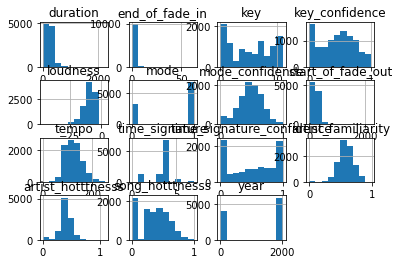

In [22]:
# check for highly skewed features
df.hist()

<p> It seems no highly skewed features </p>

In [23]:
def fun(row):
    if row['song_hotttnesss'] >= 0.5:
        val = 1
    else:
        val = 0
    return val

In [24]:
df['is popular'] = df.apply(fun,  axis=1)

In [25]:
df.drop(['song_hotttnesss'], axis=1, inplace=True)
df.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,title,year,is popular
0,252.05506,2.049,10,0.777,-4.829,0,0.688,236.635,87.002,4,0.940,0.649822,0.394032,Silent Night,2003,1
1,156.55138,0.258,9,0.808,-10.555,1,0.355,148.660,150.778,1,0.000,0.439604,0.356992,Tanssi vaan,1995,0
2,138.97098,0.000,7,0.418,-2.060,1,0.566,138.971,177.768,4,0.446,0.643681,0.437504,No One Could Ever,2006,1
12,301.60934,0.000,1,0.450,-4.882,1,0.520,291.405,85.340,5,0.581,0.622005,0.451579,Cold Beer feat. Prince Metropolitan,0,0
13,318.45832,0.502,10,0.764,-10.670,1,0.627,306.265,67.567,3,0.676,0.621826,0.406985,Pilots,2005,0


In [26]:
# check for null values distribution
df.isnull().sum()

duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
start_of_fade_out            0
tempo                        0
time_signature               0
time_signature_confidence    0
artist_familiarity           0
artist_hotttnesss            0
title                        0
year                         0
is popular                   0
dtype: int64

In [27]:
# 1 - popular
# 0 - not popular

In [28]:
df.shape

(10000, 16)

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'end_of_fade_in'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'key_confidence'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'mode_confidence'}>,
        <AxesSubplot:title={'center':'start_of_fade_out'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'time_signature_confidence'}>,
        <AxesSubplot:title={'center':'artist_familiarity'}>],
       [<AxesSubplot:title={'center':'artist_hotttnesss'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'is popular'}>, <AxesSubplot:>]],
      dtype=object)

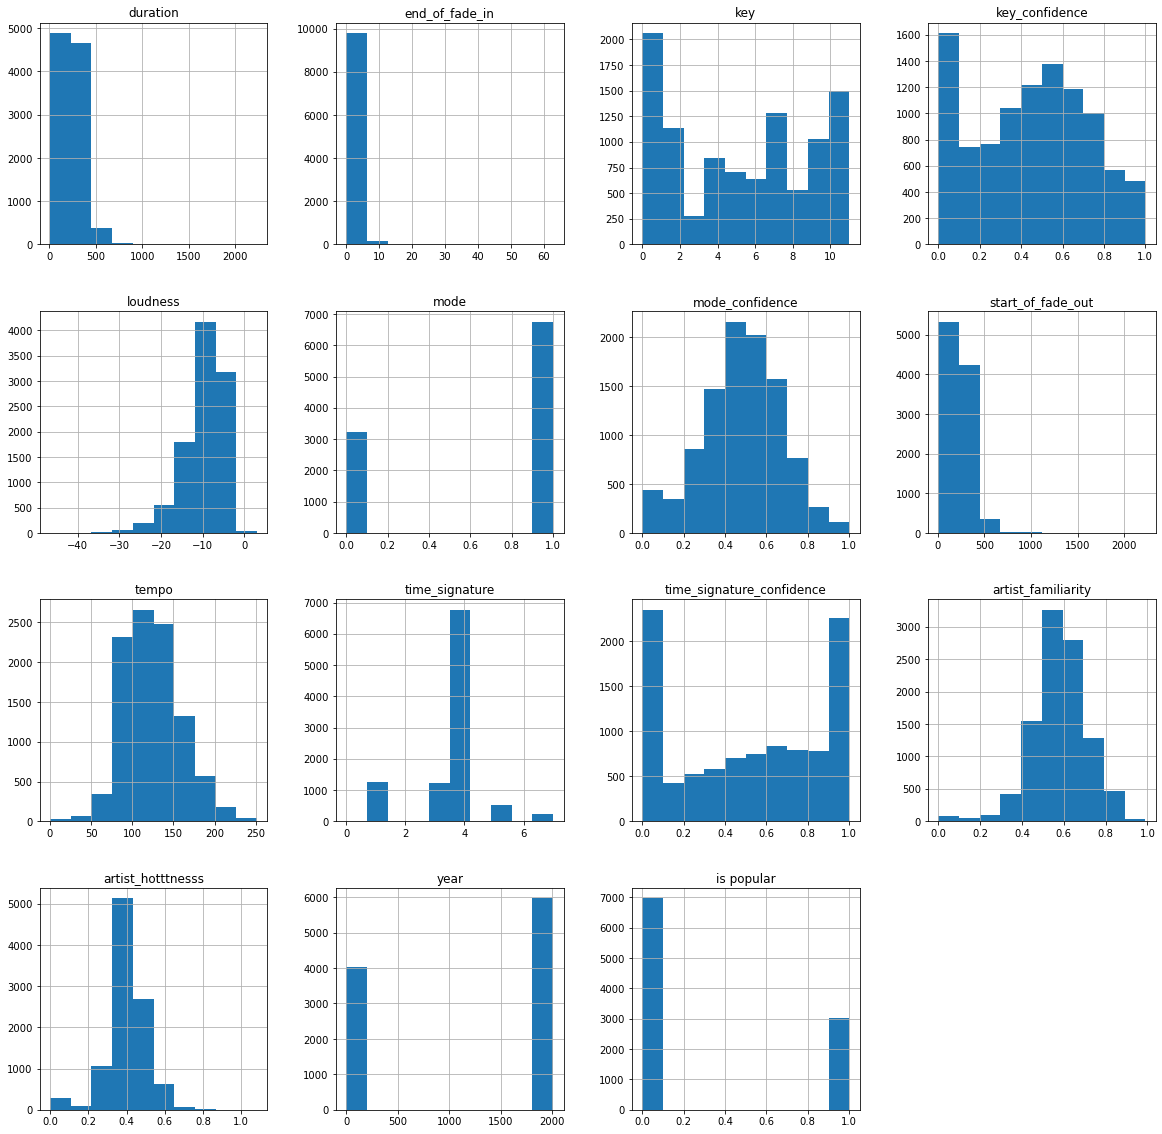

In [29]:
# check for normalized features 
df.hist(figsize=(20, 20))

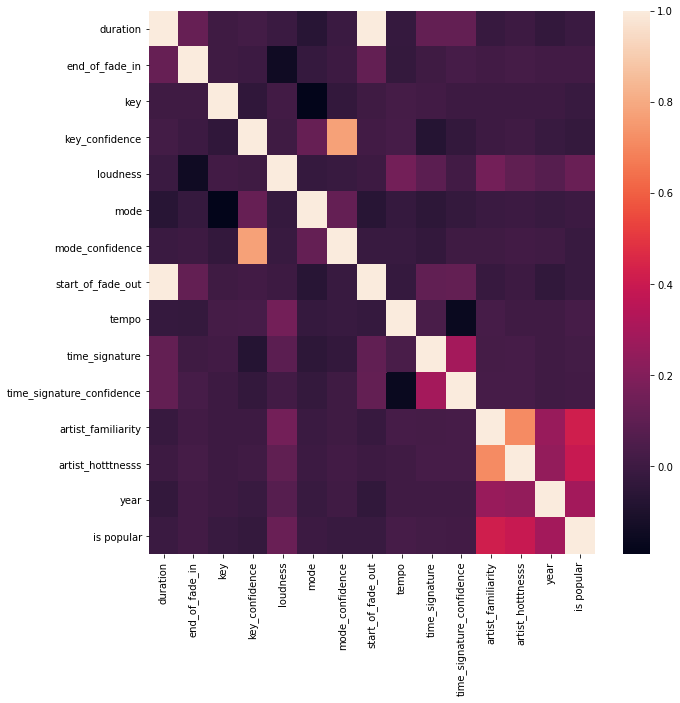

In [30]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr());

In [31]:
print(df.corr())

                           duration  end_of_fade_in       key  key_confidence  \
duration                   1.000000        0.120059  0.007322        0.017899   
end_of_fade_in             0.120059        1.000000  0.005700       -0.004910   
key                        0.007322        0.005700  1.000000       -0.039823   
key_confidence             0.017899       -0.004910 -0.039823        1.000000   
loudness                  -0.008633       -0.143356  0.016085        0.005750   
mode                      -0.064655       -0.021365 -0.193073        0.122022   
mode_confidence           -0.008030       -0.000917 -0.032889        0.773517   
start_of_fade_out          0.998298        0.113139  0.006072        0.014793   
tempo                     -0.025174       -0.029772  0.023308        0.027582   
time_signature             0.110986        0.007108  0.015351       -0.073994   
time_signature_confidence  0.113472        0.030331 -0.000106       -0.033643   
artist_familiarity        -0

<p> It seems artist_familiarity and artist_hotttnesss have strong correlation </p>

In [32]:
df.head()

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,title,year,is popular
0,252.05506,2.049,10,0.777,-4.829,0,0.688,236.635,87.002,4,0.940,0.649822,0.394032,Silent Night,2003,1
1,156.55138,0.258,9,0.808,-10.555,1,0.355,148.660,150.778,1,0.000,0.439604,0.356992,Tanssi vaan,1995,0
2,138.97098,0.000,7,0.418,-2.060,1,0.566,138.971,177.768,4,0.446,0.643681,0.437504,No One Could Ever,2006,1
12,301.60934,0.000,1,0.450,-4.882,1,0.520,291.405,85.340,5,0.581,0.622005,0.451579,Cold Beer feat. Prince Metropolitan,0,0
13,318.45832,0.502,10,0.764,-10.670,1,0.627,306.265,67.567,3,0.676,0.621826,0.406985,Pilots,2005,0


In [33]:
df.drop(['title'], axis=1, inplace=True)

In [34]:
# check for null values distribution
df.isnull().sum()

duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
start_of_fade_out            0
tempo                        0
time_signature               0
time_signature_confidence    0
artist_familiarity           0
artist_hotttnesss            0
year                         0
is popular                   0
dtype: int64

In [35]:
# split X and y
X = df.drop(['is popular'], axis=1)
y = df[['is popular']]

<AxesSubplot:title={'center':'Check for class imbalance'}>

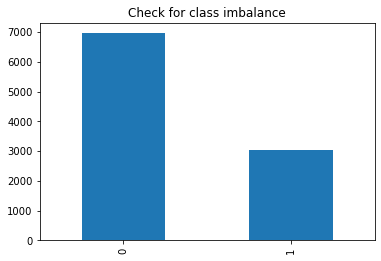

In [36]:
df['is popular'].value_counts().plot(kind='bar', title='Check for class imbalance')

In [37]:
# check for null values
y.isnull().values.any()

False

In [38]:
from imblearn.over_sampling import ADASYN

# apply ADASYN to resolve class imbalance
ada = ADASYN()
X_ada ,y_ada = ada.fit_resample(X, y)

<AxesSubplot:title={'center':'Check for class imbalance'}>

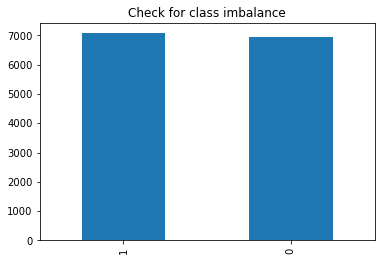

In [39]:
y_ada['is popular'].value_counts().plot(kind='bar', title='Check for class imbalance')

In [40]:
# spliting dataset
X_train,X_test,y_train,y_test = train_test_split(X_ada, y_ada, test_size=0.2,random_state = 101)

# reset indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train.head(5)

,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,artist_familiarity,artist_hotttnesss,year
0,241.135870,3.349000,9,0.016000,-14.052000,0,0.350000,236.048000,137.830000,4,0.000000,0.535360,0.388341,1980
1,200.733099,0.033712,4,0.528773,-4.182173,0,0.574539,185.671688,94.589956,4,0.836665,0.596795,0.439655,2005
2,305.449340,2.252000,0,0.000000,-22.013000,1,0.000000,285.832000,96.764000,5,0.402000,0.565165,0.403881,2001
3,343.849340,0.000000,9,0.553000,-8.767000,1,0.499000,316.923000,100.968000,4,0.377000,0.474335,0.000000,2003
4,229.197910,1.437000,1,0.871000,-14.662000,1,0.736000,202.908000,96.817000,4,0.715000,0.483156,0.309128,0


In [41]:
print(f'X_train shape = {X_train.shape}, X_test shape = {X_test.shape}, y_train shape = {y_train.shape}, y_test shape = {y_test.shape}')

X_train shape = (11227, 14), X_test shape = (2807, 14), y_train shape = (11227, 1), y_test shape = (2807, 1)


[0.05801736 0.0542846  0.05917753 0.05917768 0.06411135 0.01811691
 0.05674962 0.05785348 0.06106829 0.03774426 0.06169197 0.16053846
 0.14597213 0.10549637]


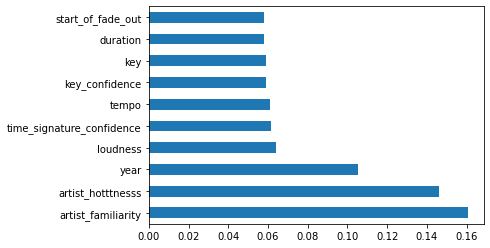

In [42]:
model = ExtraTreesClassifier()
model.fit(X_ada, y_ada)
print(model.feature_importances_) # use inbuilt class feature_importances of tree based regressors
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### 1. Gradient Boosting Machine

In [43]:
gb_0 = GradientBoostingClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(gb_0.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 8,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

Tree-related hyperparameters:
* `n_estimators` = number of trees in the forest.
* `max_features` = max number of features considered for splitting a node
* `max_depth` = max number of levels in each decision tree
* `min_samples_split` = min number of data points placed in a node before the node is split
* `min_samples_leaf` = min number of data points allowed in a leaf node

Boosting-related hyperparameters:
* `learning_rate`= learning rate shrinks the contribution of each tree by learning_rate.
* `subsample`= the fraction of samples to be used for fitting the individual base learners.

In [44]:
# n_estimators
n_estimators = [10, 100, 200]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [10, 30, 50]
max_depth.append(None)

# min_samples_split
min_samples_split = [10, 30, 50]

# min_samples_leaf
min_samples_leaf = [1, 2, 4, 6]

# learning rate
learning_rate = [.1, .5]

# subsample
subsample = [.5, 1.]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate,
               'subsample': subsample}

pprint(random_grid)

{'learning_rate': [0.1, 0.5],
 'max_depth': [10, 30, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [10, 30, 50],
 'n_estimators': [10, 100, 200],
 'subsample': [0.5, 1.0]}


In [45]:
# First create the base model to tune
gbc = GradientBoostingClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=gbc,
                                   param_distributions=random_grid,
                                   n_iter=3,
                                   scoring='f1_macro',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train.values, y_train.values)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=8),
                   n_iter=3,
                   param_distributions={'learning_rate': [0.1, 0.5],
                                        'max_depth': [10, 30, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [10, 30, 50],
                                        'n_estimators': [10, 100, 200],
                                        'subsample': [0.5, 1.0]},
                   random_state=8, scoring='f1_macro', verbose=1)

In [46]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'subsample': 1.0, 'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'learning_rate': 0.1}

The mean accuracy of a model with these hyperparameters is:
0.786075847000722


In [55]:
# Create the parameter grid based on the results of random search 
max_depth = [50, 60]
max_features = ['sqrt']
min_samples_leaf = [1, 2]
min_samples_split = [10, 12]
n_estimators = [10, 15]
learning_rate = [.1]
subsample = [1.0, 1.2]

param_grid = {
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'subsample': subsample

}

# Create a base model
gbc = GradientBoostingClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .2, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gbc, 
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train.values, y_train.values)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.2, train_size=None),
             estimator=GradientBoostingClassifier(random_state=8),
             param_grid={'learning_rate': [0.1], 'max_depth': [50, 60],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 12],
                         'n_estimators': [10, 15], 'subsample': [1.0, 1.2]},
             scoring='f1_macro', verbose=1)

In [56]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'learning_rate': 0.1, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 15, 'subsample': 1.0}

The mean accuracy of a model with these hyperparameters is:
0.7974934211795329


In [57]:
best_gbc = grid_search.best_estimator_

In [58]:
best_gbc.fit(X_train.values, y_train.values)

GradientBoostingClassifier(max_depth=50, max_features='sqrt',
                           min_samples_leaf=2, min_samples_split=10,
                           n_estimators=15, random_state=8)

In [59]:
print("The training accuracy is: ")
print(accuracy_score(y_train, best_gbc.predict(X_train)))

The training accuracy is: 
1.0


In [60]:
print("The test accuracy is: ")
print(accuracy_score(y_test, best_gbc.predict(X_test)))

The test accuracy is: 
0.8065550409690061


In [61]:
print("Classification report for testing")
print(classification_report(y_test,best_gbc.predict(X_test)))

Classification report for testing
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1415
           1       0.80      0.82      0.81      1392

    accuracy                           0.81      2807
   macro avg       0.81      0.81      0.81      2807
weighted avg       0.81      0.81      0.81      2807



In [62]:
print("Classification report for testing")
print(classification_report(y_test,best_gbc.predict(X_test)))

Classification report for testing
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1415
           1       0.80      0.82      0.81      1392

    accuracy                           0.81      2807
   macro avg       0.81      0.81      0.81      2807
weighted avg       0.81      0.81      0.81      2807



### 2. Logistic Regression

In [63]:
lr_0 = LogisticRegression(random_state = 8)

print('Parameters currently in use:\n')
pprint(lr_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


* `C` = Inverse of regularization strength. Smaller values specify stronger regularization.
* `multi_class` = We'll choose `multinomial` because this is a multi-class problem.
* `solver` = Algorithm to use in the optimization problem. For multiclass problems, only `newton-cg`, `sag`, `saga` and `lbfgs` handle multinomial loss.
* `class_weight`: Weights associated with classes. 
* `penalty`: Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.

In [64]:
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['auto']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = [None]

# penalty
penalty = ['l2']

# Create the random grid
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_grid)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': [None],
 'multi_class': ['auto'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [65]:
# First create the base model to tune
lrc = LogisticRegression(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=lrc,
                                   param_distributions=random_grid,
                                   n_iter=10,
                                   scoring='f1_macro',
                                   cv=5, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=8),
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'class_weight': [None],
                                        'multi_class': ['auto'],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'sag', 'saga',
                                                   'lbfgs']},
                   random_state=8, scoring='f1_macro', verbose=1)

In [66]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'auto', 'class_weight': None, 'C': 0.7000000000000001}

The mean accuracy of a model with these hyperparameters is:
0.7498859932548477


In [67]:
# Create the parameter grid based on the results of random search 
C = [float(x) for x in np.linspace(start = 0.6, stop = 1.0, num = 10)]
multi_class = ['auto']
solver = ['newton-cg']
class_weight = [None]
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

# Create a base model
lrc = LogisticRegression(random_state=8)
cv_sets = ShuffleSplit(n_splits = 5, test_size = .2, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lrc, 
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=8, test_size=0.2, train_size=None),
             estimator=LogisticRegression(random_state=8),
             param_grid={'C': [0.6, 0.6444444444444444, 0.6888888888888889,
                               0.7333333333333333, 0.7777777777777778,
                               0.8222222222222222, 0.8666666666666667,
                               0.9111111111111111, 0.9555555555555555, 1.0],
                         'class_weight': [None], 'multi_class': ['auto'],
                         'penalty': ['l2'], 'solver': ['newton-cg']},
             scoring='f1_macro', verbose=1)

In [68]:
# select best estimator
best_lrc = grid_search.best_estimator_

In [69]:
best_lrc.fit(X_train, y_train)

LogisticRegression(C=0.6444444444444444, random_state=8, solver='newton-cg')

In [70]:
print("The training accuracy is: ")
print(accuracy_score(y_train, best_lrc.predict(X_train)))

The training accuracy is: 
0.7504230872004988


In [71]:
print("The test accuracy is: ")
print(accuracy_score(y_test, best_lrc.predict(X_test)))

The test accuracy is: 
0.7502671891699323


In [72]:
print("Classification report for training")
print(classification_report(y_train,best_lrc.predict(X_train)))

Classification report for training
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      5548
           1       0.75      0.76      0.76      5679

    accuracy                           0.75     11227
   macro avg       0.75      0.75      0.75     11227
weighted avg       0.75      0.75      0.75     11227



In [74]:
print("Classification report for testing")
print(classification_report(y_test,best_lrc.predict(X_test)))

Classification report for testing
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1415
           1       0.74      0.76      0.75      1392

    accuracy                           0.75      2807
   macro avg       0.75      0.75      0.75      2807
weighted avg       0.75      0.75      0.75      2807

